<a href="https://colab.research.google.com/github/rohammaiti/rohammaiti/blob/main/Number_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


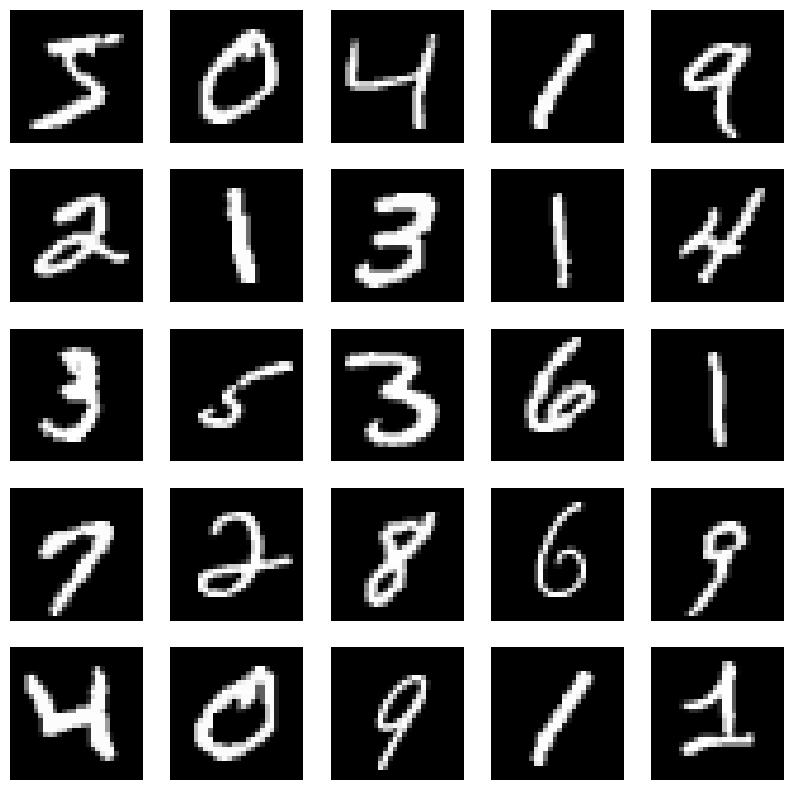

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [13]:
history=model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc*100)

Epoch 1/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0507 - val_accuracy: 0.9898
Epoch 2/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0566 - val_accuracy: 0.9893
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0629 - val_accuracy: 0.9892
Epoch 4/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0508 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0392 - accuracy: 0.9916
Test accuracy: 99.1599977016449


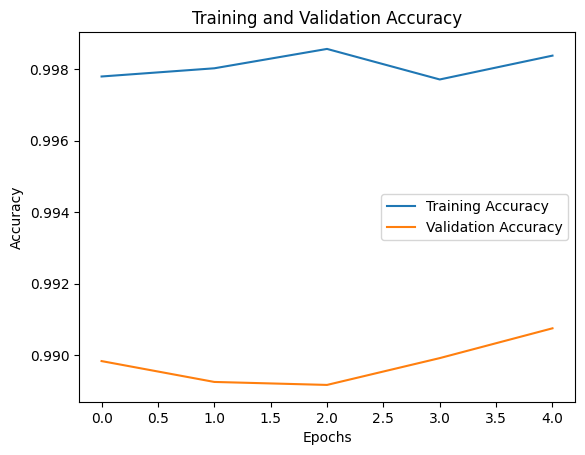

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

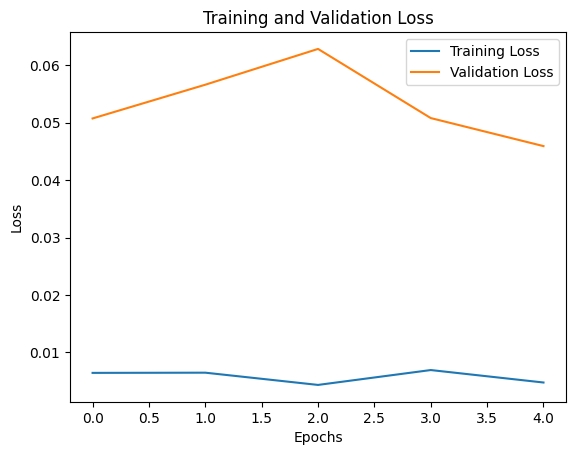

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 119ms/step


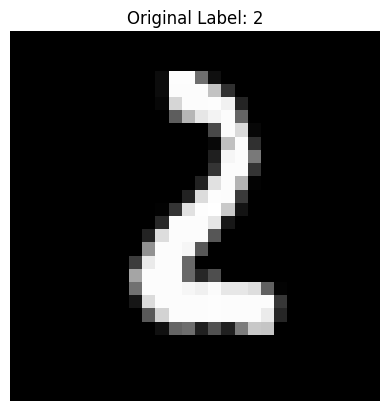

Predicted Label: 2


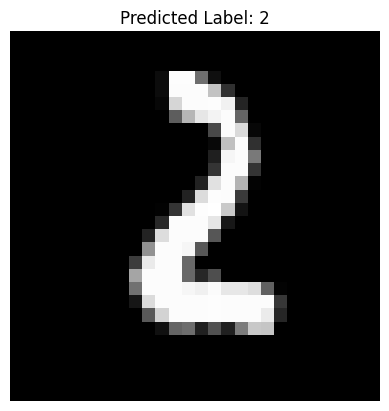

In [16]:
random_index = np.random.randint(0, len(test_images))
test_image = test_images[random_index]
true_label = test_labels[random_index]

test_image = np.expand_dims(test_image, axis=0)

predicted_label = np.argmax(model.predict(test_image), axis=-1)[0]

plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'Original Label: {true_label}')
plt.show()

print(f'Predicted Label: {predicted_label}')
plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

uploaded_image_path = list(uploaded.keys())[0]
uploaded_image = cv2.imread(uploaded_image_path, cv2.IMREAD_GRAYSCALE)

resized_image = cv2.resize(uploaded_image, (28, 28))
normalized_image = resized_image / 255.0
reshaped_image = np.expand_dims(normalized_image, axis=0)
reshaped_image = np.expand_dims(reshaped_image, axis=-1)
predicted_label = np.argmax(model.predict(reshaped_image), axis=-1)[0]
plt.imshow(uploaded_image, cmap='gray')
plt.axis('off')
plt.title('Uploaded Image')
plt.show()
print(f'Predicted Label: {predicted_label}')